In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
diabetes_dataset = pd.read_csv("diabetes.csv")
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts() # tell the count of diabetic and non diabetic

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


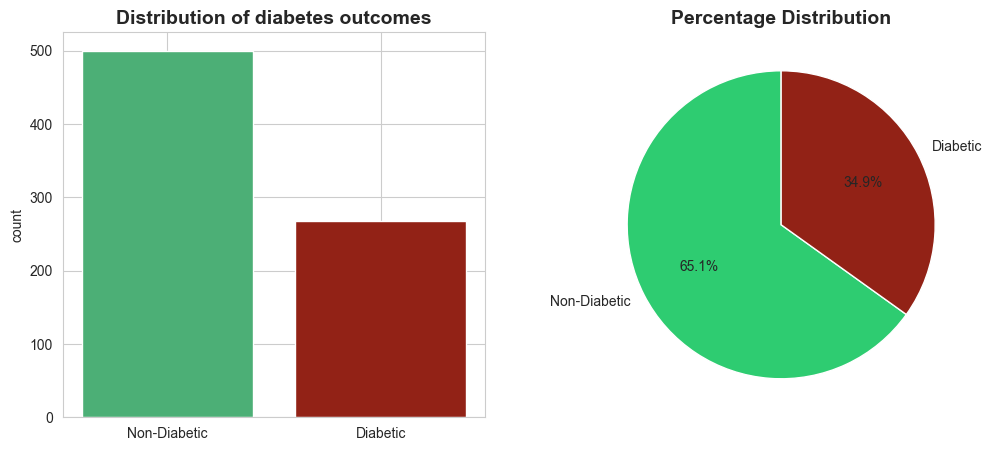

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
outcome_counts = diabetes_dataset['Outcome'].value_counts()
plt.bar(['Non-Diabetic', 'Diabetic'], outcome_counts.values, color=["#4caf76","#922216"])
plt.title('Distribution of diabetes outcomes', fontsize=14, fontweight='bold')
plt.ylabel('count')

plt.subplot(1,2,2)
plt.pie(outcome_counts.values,
        labels=['Non-Diabetic', 'Diabetic'],
        autopct='%1.1f%%',
        colors=['#2ecc71', '#922216'],  
        startangle=90)

plt.title('Percentage Distribution', fontsize=14, fontweight='bold')
plt.show()


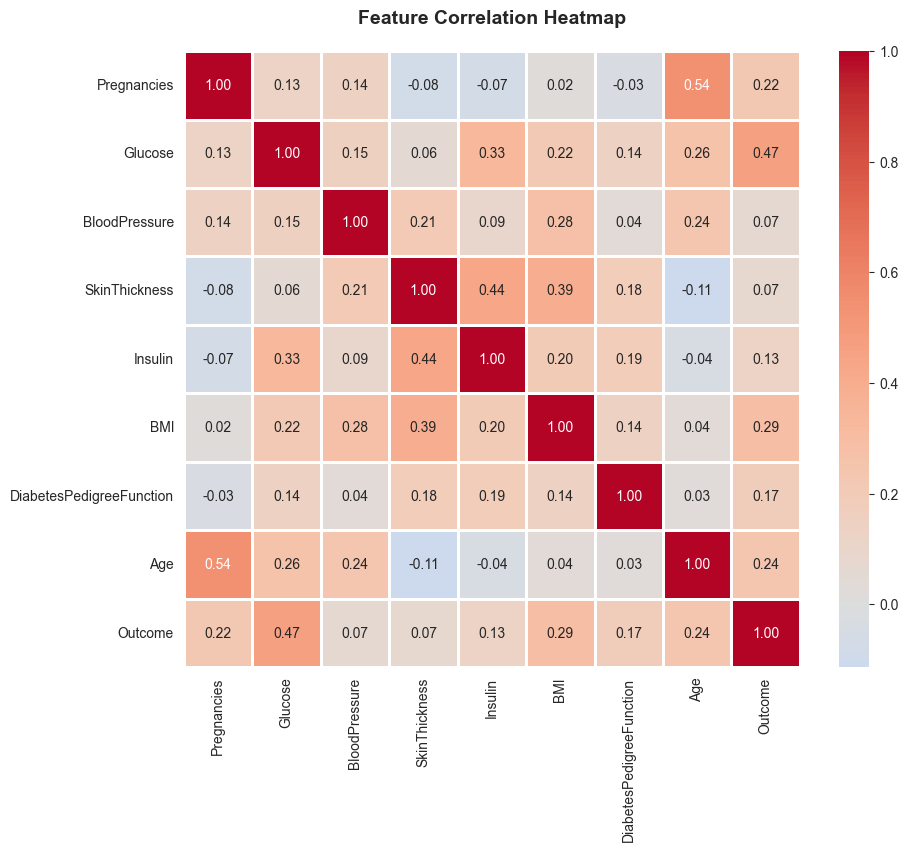

In [19]:
plt.figure(figsize=(10,8))
correlation = diabetes_dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square=True, linewidths=1, fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14, pad=20, fontweight='bold')
plt.show()

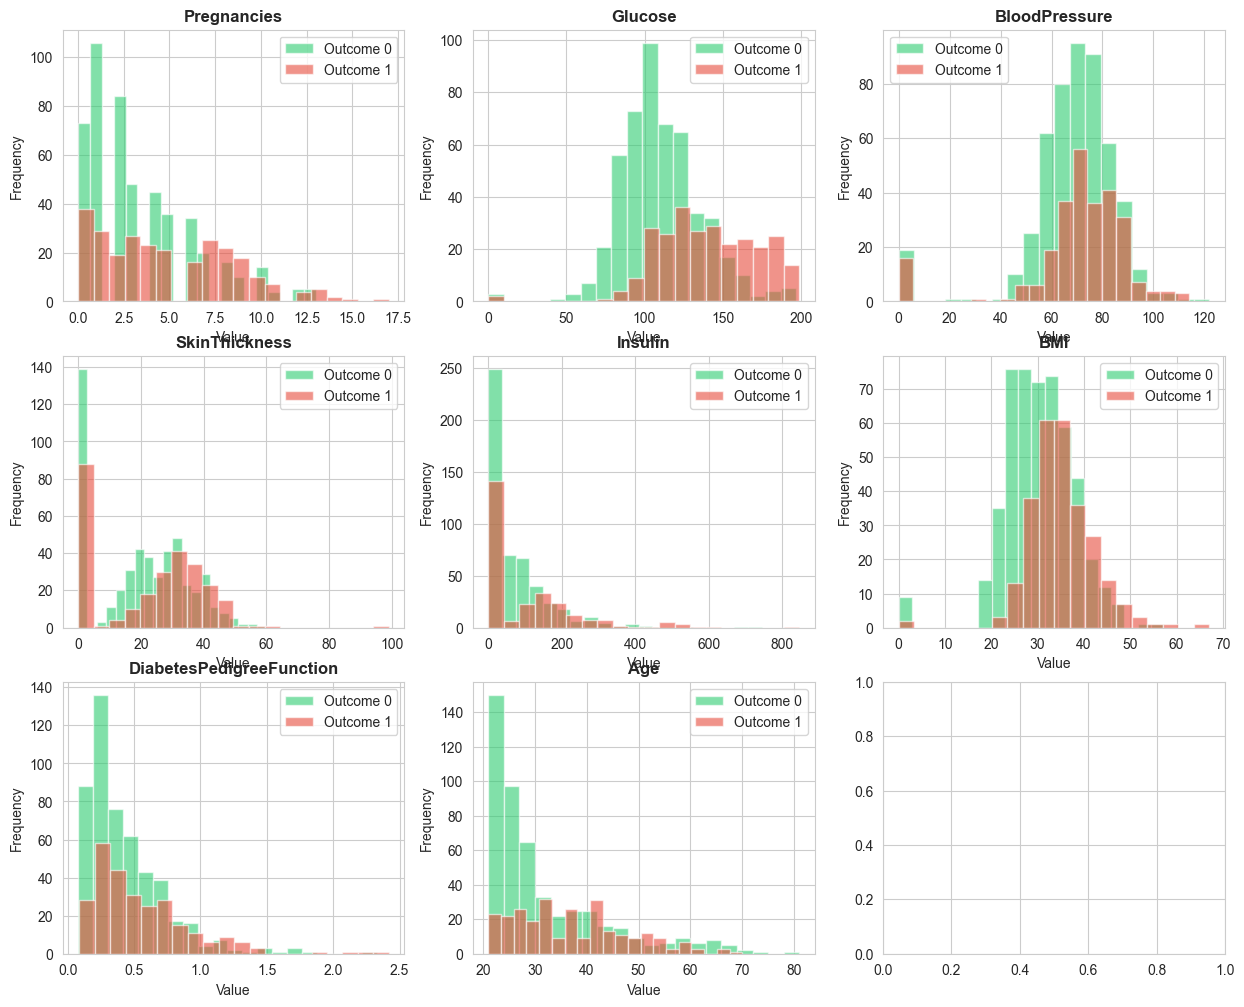

In [20]:
# Visualisation of feature distribution 

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = diabetes_dataset.columns[:-1]

for idx, feature in enumerate(features):
    row, col = idx // 3, idx % 3
    for outcome in [0, 1]:
        data = diabetes_dataset[diabetes_dataset['Outcome'] == outcome][feature]
        axes[row, col].hist(data, alpha=0.6, bins=20, label=f'Outcome {outcome}',
                             color=['#2ecc71', '#e74c3c'][outcome])
    
    axes[row, col].set_title(feature, fontweight='bold')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.show()



In [22]:
# Data Preprocessing 

X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)
print(X.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


In [25]:
classifier = svm.SVC(kernel='linear', probability=True)
classifier.fit(x_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [26]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_accuracy

0.7866449511400652

In [27]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy

0.7727272727272727

In [28]:
precision = precision_score(y_test, x_test_prediction)
recall = recall_score(y_test, x_test_prediction)
f1 = f1_score(y_test, x_test_prediction)

print(precision,recall,f1)

0.7567567567567568 0.5185185185185185 0.6153846153846154


In [29]:
cm_svm = confusion_matrix(y_test,x_test_prediction)
cm_svm

array([[91,  9],
       [26, 28]])

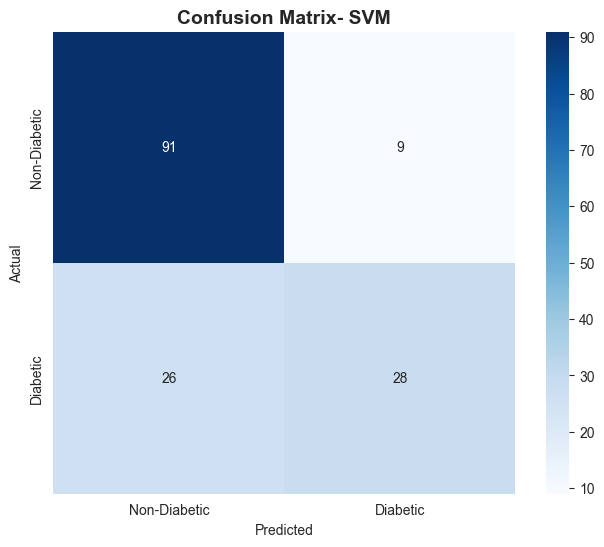

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix- SVM', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [32]:
x_train_prediction_rf = rf_classifier.predict(x_train)

In [33]:
training_data_accuracy_rf = accuracy_score(x_train_prediction_rf,y_train)
training_data_accuracy_rf

1.0

In [34]:
x_test_prediction_rf = rf_classifier.predict(x_test)

test_data_accuracy_rf = accuracy_score(x_test_prediction_rf,y_test)
test_data_accuracy_rf

0.7207792207792207

In [36]:
precision_rf = precision_score(y_test, x_test_prediction_rf)
recall_rf = recall_score(y_test, x_test_prediction_rf)
f1_rf = f1_score(y_test, x_test_prediction_rf)

print(precision_rf,recall_rf,f1_rf)

0.6341463414634146 0.48148148148148145 0.5473684210526316


In [37]:
cm_rf = confusion_matrix(y_test,x_test_prediction_rf)
print(cm_rf)

[[85 15]
 [28 26]]


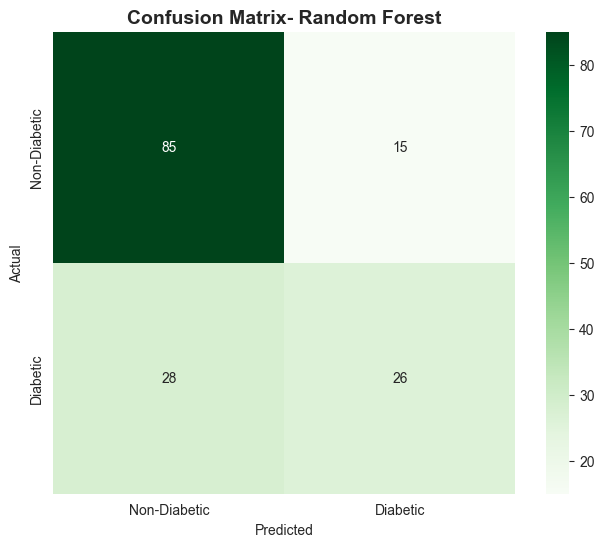

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', square=True,
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix- Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
print('SVM',test_data_accuracy)
print('Random Forest',test_data_accuracy_rf)

SVM 0.7727272727272727
Random Forest 0.7207792207792207


In [46]:
import joblib

joblib.dump(rf_classifier, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [50]:
input_data = (5,166,73,19,175,26.6,0.676,56)
input_num_array = np.asarray(input_data)
reshape = input_num_array.reshape(1,-1)

std_data = scaler.transform(reshape)
prediction = rf_classifier.predict(std_data)



In [51]:
prediction

array([1])